<a href="https://colab.research.google.com/github/mohammadreza76/first-clustring-project/blob/master/clustring_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.impute import SimpleImputer

In [ ]:
data1 = pd.read_csv('Radius-Queries.csv',names = ['X-coordinate','Y-coordinate', 'R-Radius'])

In [ ]:
data1

,X-coordinate,Y-coordinate,R-Radius
0,0.090028,-0.016171,0.351216
1,0.326260,-0.000570,0.379557
2,0.046913,-0.054294,0.292925
3,0.079560,-0.029849,0.416946
4,0.111846,-0.092659,0.349373
...,...,...,...
49995,0.110117,-0.090780,0.275304
49996,0.031257,-0.054150,0.494199
49997,0.308090,-0.146001,0.528061
49998,0.101471,-0.078260,0.324202


In [ ]:
data1.describe()

,X-coordinate,Y-coordinate,R-Radius
count,50000.000000,50000.000000,50000.000000
mean,0.180156,-0.062978,0.379064
std,0.124295,0.047916,0.099861
min,-0.002056,-0.179064,-0.058307
25%,0.088610,-0.090412,0.311977
50%,0.109007,-0.058997,0.378856
75%,0.325008,-0.018977,0.446788
max,0.373041,0.025835,0.797754


In [ ]:
data1.isnull().values.any()

False

In [ ]:
X = data1.iloc[:,:].values
X

array([[ 0.09002792, -0.01617105,  0.35121557],
       [ 0.32625997, -0.00057012,  0.37955698],
       [ 0.04691309, -0.05429421,  0.29292456],
       ...,
       [ 0.30809018, -0.14600059,  0.52806139],
       [ 0.10147053, -0.07825971,  0.32420198],
       [ 0.01771172, -0.05459945,  0.55321949]])

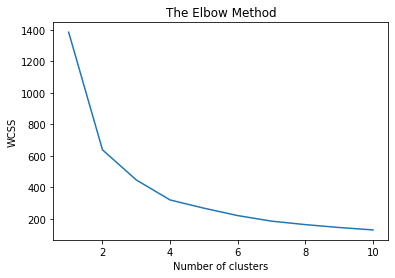

In [ ]:
wcss = []
for i in range(1,11):
  cluster_model = KMeans(n_clusters= i,random_state= 42)
  cluster_model.fit(X)
  wcss.append(cluster_model.inertia_)
plt.plot(range(1,11),wcss) 
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show() 

In [ ]:
k_mean_model = KMeans(n_clusters=4,random_state= 42)
y_kmeans = k_mean_model.fit_predict(X)

In [ ]:
print(y_kmeans)

[1 0 1 ... 3 1 2]


In [ ]:
centroids = k_mean_model.cluster_centers_

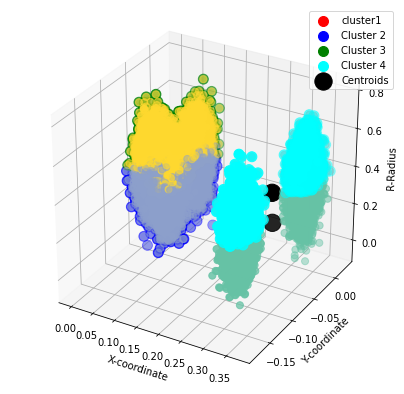

In [ ]:
plt.figure('data1 dataset', figsize=(7,7))
ax =plt.axes(projection = '3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=y_kmeans,cmap='Set2' , s=50);

# plot centroids
ax.scatter(X[k_mean_model == 0,0],X[k_mean_model ==0 ,1],X[k_mean_model == 0,2],s = 100, c='red',label = 'cluster1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],X[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2],s = 100, c = 'green', label = 'Cluster 3')
ax.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1],X[y_kmeans == 3, 2], s = 100, c = 'cyan', label = 'Cluster 4')
ax.scatter(k_mean_model.cluster_centers_[:,0],k_mean_model.cluster_centers_[:, 1],k_mean_model.cluster_centers_[:, 2] ,s = 300, c = 'black',
           label = 'Centroids')
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.set_zlabel('R-Radius')
ax.legend()

In [ ]:
data2 = pd.read_csv('Radius-Queries-Count.csv',names=['X-coordinate','Y-coordinate', 'R-Radius', 'Count'])

In [ ]:
data2

,X-coordinate,Y-coordinate,R-Radius,Count
0,0.170446,0.251765,0.104563,251
1,0.161183,0.122247,0.109897,408
2,0.097526,0.124123,0.100691,468
3,0.077274,0.232118,0.103934,53
4,0.079819,0.240690,0.104495,48
...,...,...,...,...
9995,0.165496,0.119426,0.103261,288
9996,0.074740,0.147059,0.109752,344
9997,0.094134,0.128956,0.101193,414
9998,0.090355,0.145522,0.107744,344


In [ ]:
data2.describe()

,X-coordinate,Y-coordinate,R-Radius,Count
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.114685,0.175794,0.105030,264.833400
std,0.040878,0.054179,0.002880,130.109685
min,0.029784,0.074242,0.100001,2.000000
25%,0.080251,0.132728,0.102554,229.000000
50%,0.095697,0.151403,0.105073,277.000000
75%,0.157830,0.234690,0.107535,351.000000
max,0.201790,0.277662,0.109999,695.000000


In [ ]:
data2.isnull().values.any()

False

In [ ]:
standard_scale = StandardScaler()

In [ ]:
X_data2 = data2.values

In [ ]:
X_data2

array([[1.70445543e-01, 2.51764852e-01, 1.04563463e-01, 2.51000000e+02],
       [1.61183384e-01, 1.22246974e-01, 1.09896571e-01, 4.08000000e+02],
       [9.75257885e-02, 1.24123180e-01, 1.00691034e-01, 4.68000000e+02],
       ...,
       [9.41344576e-02, 1.28956449e-01, 1.01193476e-01, 4.14000000e+02],
       [9.03545905e-02, 1.45522020e-01, 1.07744266e-01, 3.44000000e+02],
       [1.58790666e-01, 1.17885970e-01, 1.05155719e-01, 3.40000000e+02]])

In [ ]:
X_data2 = standard_scale.fit_transform(X_data2)

In [ ]:
X_data2

array([[ 1.36411856,  1.40229878, -0.16187884, -0.10632638],
       [ 1.13752931, -0.98838875,  1.68982626,  1.10040816],
       [-0.41978869, -0.95375707, -1.50642277,  1.56158059],
       ...,
       [-0.50275413, -0.86454285, -1.33197023,  1.1465254 ],
       [-0.59522472, -0.55876958,  0.94252559,  0.6084909 ],
       [ 1.07899391, -1.06888573,  0.04375777,  0.57774607]])

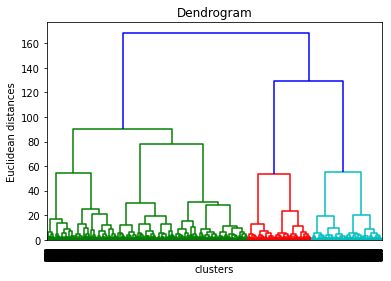

In [ ]:
dendogram = hierarchy.dendrogram(hierarchy.linkage(X_data2,method='ward'))
plt.title('Dendrogram')
plt.xlabel('clusters')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
hierarchy_model = AgglomerativeClustering(n_clusters= 3)
y_hierarchy_model = hierarchy_model.fit_predict(X_data2)

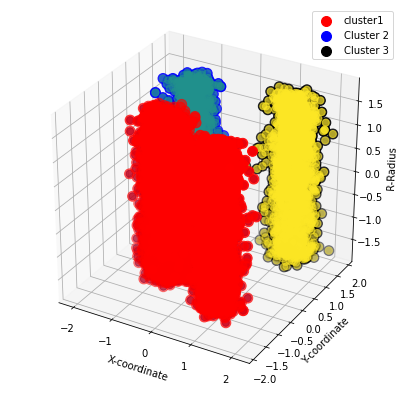

In [ ]:
plt.figure('data2 dataset', figsize=(7,7))
ax_1 =plt.axes(projection = '3d')
ax_1.scatter(X_data2[:,0],X_data2[:,1],X_data2[:,2],c=y_hierarchy_model,s= 50);


ax_1.scatter(X_data2[y_hierarchy_model == 0,0],X_data2[y_hierarchy_model ==0 ,1],X_data2[y_hierarchy_model == 0,2],s = 100, c='red',label = 'cluster1')
ax_1.scatter(X_data2[y_hierarchy_model == 1, 0], X_data2[y_hierarchy_model == 1, 1],X_data2[y_hierarchy_model == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
ax_1.scatter(X_data2[y_hierarchy_model == 2, 0], X_data2[y_hierarchy_model == 2, 1], X_data2[y_hierarchy_model == 2, 2],s = 100, c = 'black', label = 'Cluster 3')


ax_1.set_xlabel('X-coordinate')
ax_1.set_ylabel('Y-coordinate')
ax_1.set_zlabel('R-Radius')
ax_1.legend()